In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../../Datasets/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
np.random.shuffle(data) 
m, n = data.shape# shuffle before splitting 

data_test = data[0:1000].T
data_train = data[1000:m].T

Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255

Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

_, m_train = X_train.shape

In [5]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def derivated_ReLU(Z):
    return Z > 0

def one_hot_encode(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    
    return one_hot_Y

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2
    
def prop_forward(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

def prop_backward(Z1, A1, Z2, A2, W1, W2, X, Y):
    dZ2 = A2 - one_hot_encode(Y)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * derivated_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = prop_forward(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = prop_backward(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 25 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2


In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[4 4 1 ... 4 7 7] [5 4 2 ... 5 8 7]
Accuracy:  0.08821951219512195
Iteration:  25
[7 9 2 ... 9 7 7] [5 4 2 ... 5 8 7]
Accuracy:  0.26595121951219514
Iteration:  50
[7 4 3 ... 9 8 7] [5 4 2 ... 5 8 7]
Accuracy:  0.458
Iteration:  75
[7 4 3 ... 9 8 7] [5 4 2 ... 5 8 7]
Accuracy:  0.5718536585365853
Iteration:  100
[7 4 3 ... 5 8 7] [5 4 2 ... 5 8 7]
Accuracy:  0.6307317073170732
Iteration:  125
[7 4 3 ... 5 8 7] [5 4 2 ... 5 8 7]
Accuracy:  0.6717804878048781
Iteration:  150
[7 4 3 ... 5 8 7] [5 4 2 ... 5 8 7]
Accuracy:  0.7008780487804878
Iteration:  175
[7 4 3 ... 5 8 7] [5 4 2 ... 5 8 7]
Accuracy:  0.722609756097561
Iteration:  200
[9 4 3 ... 5 8 7] [5 4 2 ... 5 8 7]
Accuracy:  0.7412439024390244
Iteration:  225
[9 4 3 ... 5 8 7] [5 4 2 ... 5 8 7]
Accuracy:  0.7573658536585366
Iteration:  250
[9 4 3 ... 5 8 7] [5 4 2 ... 5 8 7]
Accuracy:  0.7706341463414634
Iteration:  275
[9 4 3 ... 5 8 7] [5 4 2 ... 5 8 7]
Accuracy:  0.7813170731707317
Iteration:  300
[9 4 3 ... 5 8 7]

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = prop_forward(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_img = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]

    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_img = current_img.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_img, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


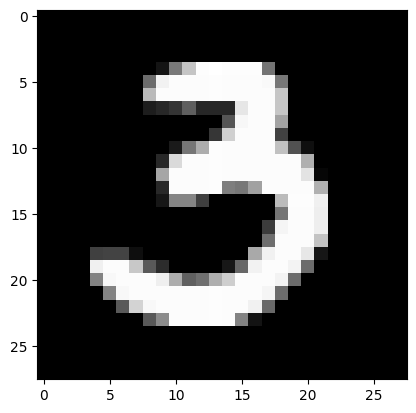

In [9]:
test_prediction(46, W1, b1, W2, b2)

In [10]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
np.save('/tmp/accuracy.npy', dev_predictions)
get_accuracy(dev_predictions, Y_test)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/accuracy.npy'